In [1]:
import json
import numpy as np
import pandas as pd
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [2]:
file = "/Users/meiyihe/Desktop/NYU/Fall2018/data/renttherunway_final_data.json"
df = pd.read_json(file, lines=True)

In [3]:
df.shape

(192544, 15)

In [4]:
df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


In [19]:
#df.describe()
#df['category'].unique()
#df['rented for'].unique()

In [5]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [6]:
len(df_train)

129004

In [7]:
# user: list of items
user_itemList = defaultdict(set)
# item: list of users
item_userList = defaultdict(set)

for idx, row in df.iterrows():
    user_itemList[row['user_id']].add( row['item_id'] )

    item_userList[row['item_id']].add( row['user_id'] )

In [8]:
user_list = []
item_list = []
for idx, row in df.iterrows():
    user_list.append(row['user_id'])
    item_list.append(row['item_id'])  

In [9]:
# build a non-visited user-item pair lists
non_visited = []
for idx, row in df.iterrows():
    curr_user = row['user_id']
    tmp_business = random.choice(item_list)
    while tmp_business in item_userList[curr_user]:
        tmp_business = random.choice(item_list)
    non_visited.append([curr_user, tmp_business])

In [10]:
non_visited = shuffle(non_visited)

In [11]:
non_visited[0]

[54853, 241461]

In [12]:
y_test = []
X_test = []
for i in range(len(df_test)):
    X_test.append(non_visited[i])
    y_test.append(0)
    
for idx, row in df_test.iterrows():
    X_test.append([row['user_id'], row['item_id']])
    y_test.append(1)

In [13]:
X_test, y_test = shuffle(X_test, y_test)

In [14]:
X_test[:10]

[[691468, 765009],
 [374034, 1711936],
 [205126, 1457171],
 [896882, 2603909],
 [330566, 1776214],
 [333628, 126335],
 [256677, 1663870],
 [698220, 1515339],
 [486471, 136860],
 [400533, 1431355]]

In [15]:
user_itemList[45487]

{646512, 2328827}

In [16]:
y_test[:10]

[1, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [17]:
len(y_test)

127080

In [18]:
def calculate_jaccard(A_list, B_list):
    return float(len(set(A_list)&set(B_list))) / float(len(set(A_list) | set(B_list)))
    
    
def jaccard_score(user, item, user_itemList, item_userList):
    # get the purchase history of current user
    curr_items = user_itemList[user]
    # get the users lists who have purchase this item
    curr_users = item_userList[item]
    
    # get a list of jaccard score between targetUser and 
    # users who purchased the target items
    jaccard_list = []
    for i in curr_users:
        jaccard_list.append(calculate_jaccard(curr_items, list(user_itemList[i])))
        
    return max(jaccard_list)

In [19]:
jaccard_score(308261, 730008, user_itemList, item_userList)

0.3333333333333333

(array([63540.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 63540.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

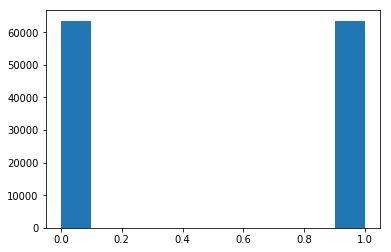

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_test)

In [20]:
# testing jaccard score method, tuning threshold
test_pred = []
threshold = 0.001
for i in range(len(X_test)):
    if jaccard_score(X_test[i][0], X_test[i][1], user_itemList, item_userList) > threshold:
        test_pred.append(1)
    else:
        test_pred.append(0)

In [23]:
test_pred[:10]

[1, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [24]:
len(test_pred)

127080

In [25]:
accuracy_score(y_test, test_pred)

0.8209395656279509